<h1> Impacts of the 2015 Nepal Earthquake

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('community-perceptions-in-earthquake-affected-nepal-round-3-1.xlsx', 
                   sheet_name='uploaded_form_g54cmb')

In [3]:
df.head()

,Name_of_interviewer,Agency,Date,Record_Location,_Record_Location_latitude,_Record_Location_longitude,_Record_Location_altitude,_Record_Location_precision,District,VDC_Municipality,...,This_is_the_end_of_the_survey_,meta/instanceID,_id,_uuid,_submission_time,_index,_parent_table_name,_parent_index,_tags,_notes
0,Suruchi Pant,accountability,2015-09-30,NaN,NaN,NaN,NaN,NaN,Kathmandu,Satungal,...,NaN,uuid:e729f3e9-0cd8-41e3-8a86-2ef3465b6110,736272,e729f3e9-0cd8-41e3-8a86-2ef3465b6110,2015-09-30T12:25:57,1,NaN,-1,NaN,NaN
1,Suruchi Pant,accountability,2015-09-26,NaN,NaN,NaN,NaN,NaN,Kathmandu,Satungal,...,NaN,uuid:c7a0ec0f-2773-4947-8b2b-050eb6b4d659,736268,c7a0ec0f-2773-4947-8b2b-050eb6b4d659,2015-09-30T12:23:55,2,NaN,-1,NaN,NaN
2,Suruchi Pant,accountability,2015-09-26,NaN,NaN,NaN,NaN,NaN,Kathmandu,Satungal,...,NaN,uuid:f1c63191-cbdb-4e52-ba33-5cf125939c8b,736262,f1c63191-cbdb-4e52-ba33-5cf125939c8b,2015-09-30T12:21:46,3,NaN,-1,NaN,NaN
3,Jharana RaI,accountability,2015-09-28,NaN,NaN,NaN,NaN,NaN,Kathmandu,Jhormahankal,...,NaN,uuid:83625573-4b20-4876-b18d-c75789103218,736160,83625573-4b20-4876-b18d-c75789103218,2015-09-30T12:17:23,4,NaN,-1,NaN,NaN
4,Anjal Bhatta,accountability,2015-09-28,NaN,NaN,NaN,NaN,NaN,Kathmandu,Jhormahankal,...,NaN,uuid:508a6969-7f7b-4fac-8803-c1993fc410fe,736147,508a6969-7f7b-4fac-8803-c1993fc410fe,2015-09-30T12:15:20,5,NaN,-1,NaN,NaN


In [4]:
df.shape

(1400, 64)

<h2> Cleaning Data </h2>

Drop Columns where 70% of the values are NaN

In [5]:
df = df.loc[:, df.isnull().sum() < 0.7*df.shape[0]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 37 columns):
Name_of_interviewer                1400 non-null object
Agency                             1400 non-null object
Date                               1400 non-null datetime64[ns]
District                           1400 non-null object
VDC_Municipality                   1400 non-null object
Ward_                              1400 non-null int64
Age                                1400 non-null object
Gender                             1400 non-null object
Caste_ethnicity                    1400 non-null object
Occupation                         1400 non-null object
Do_you_have_any_health_problem     1400 non-null object
_1_Are_your_main_problems_bein     1400 non-null object
_1a_What_is_your_biggest_probl     1125 non-null object
_1b_What_is_your_second_biggest    1125 non-null object
_1c_What_is_your_third_biggest_    1125 non-null object
_2_Satisfied_with_gov              1400 non-nu

<h3> Drop irrelevant columns </h3>

In [6]:
# All data from 2015
(pd.DatetimeIndex(df['Date']).year).unique()

Int64Index([2015], dtype='int64', name='Date')

In [7]:
df.drop(['Name_of_interviewer', 'Agency', 'Date', 'meta/instanceID', '_id', '_uuid',\
         '_submission_time', '_index', '_parent_index'], axis=1, inplace=True)

In [8]:
df.head(20)

,District,VDC_Municipality,Ward_,Age,Gender,Caste_ethnicity,Occupation,Do_you_have_any_health_problem,_1_Are_your_main_problems_bein,_1a_What_is_your_biggest_probl,...,_4_Satisfied_with_NGOs,_4a_Top_need_NGOs,_4b_Second_need_NGOs,_5_Is_support_fair,_5a_Top_reason_not_fair,_5b_Second_reason_not_fair,_6_Prepared_for_,_7_Have_been_heard,_8_Relief_effort_progress,_9_Main_problems_women
0,Kathmandu,Satungal,1,40_54,female,Newar,other,no_difficulty,1___not_at_all,long_term_shelter__housing,...,4___mostly_yes,NaN,NaN,don_t_know,NaN,NaN,4___mostly_yes,1___not_at_all,don_t_know,1___not_at_all
1,Kathmandu,Satungal,1,55_greater,male,Newar,skilled_worker,no_difficulty,2___very_little,long_term_shelter__housing,...,2___very_little,building_mater,food_aid,2___very_little,based_on_caste,based_on_polit,4___mostly_yes,2___not_very_m,2___very_little,NaN
2,Kathmandu,Satungal,1,55_greater,male,Newar,skilled_worker,no_difficulty,2___very_little,long_term_shelter__housing,...,4___mostly_yes,NaN,NaN,2___very_little,based_on_caste,based_on_polit,4___mostly_yes,1___not_at_all,1___not_at_all,NaN
3,Kathmandu,Jhormahankal,2,15_24,female,Tamang,other,yes__some_diff,3___neutral,long_term_shelter__housing,...,3___neutral,building_mater,cash_for_work,3___neutral,based_on_dista,first_come__fi,4___mostly_yes,3___neutral,3___neutral,4___mostly_yes
4,Kathmandu,Jhormahankal,2,25_39,female,Tamang,other,no_difficulty,3___neutral,short_term_she,...,3___neutral,building_mater,cash_for_work,3___neutral,based_on_polit,first_come__fi,4___mostly_yes,3___neutral,2___very_little,4___mostly_yes
5,Kathmandu,Jhormahankal,2,40_54,female,Tamang,other,no_difficulty,1___not_at_all,long_term_shelter__housing,...,2___very_little,building_mater,cash_for_work,2___very_little,first_come__fi,based_on_polit,3___neutral,3___neutral,2___very_little,3___neutral
6,Kathmandu,Jhormahankal,2,40_54,male,Tamang,farmer_laborer,yes__some_diff,3___neutral,short_term_she,...,3___neutral,building_mater,cash_for_work,3___neutral,based_on_polit,based_on_dista,4___mostly_yes,3___neutral,3___neutral,NaN
7,Kathmandu,Jhormahankal,2,40_54,female,Tamang,other,no_difficulty,3___neutral,long_term_shelter__housing,...,3___neutral,building_mater,cash_for_work,3___neutral,based_on_polit,based_on_dista,3___neutral,3___neutral,3___neutral,3___neutral
8,Kathmandu,Sitapaila,8,25_39,female,Tamang,other,no_difficulty,3___neutral,long_term_shelter__housing,...,3___neutral,building_mater,cash_for_work,4___mostly_yes,NaN,NaN,4___mostly_yes,3___neutral,3___neutral,3___neutral
9,Kathmandu,Sitapaila,8,55_greater,female,Tamang,other,no_difficulty,3___neutral,long_term_shelter__housing,...,2___very_little,building_mater,cash_for_work,4___mostly_yes,NaN,NaN,4___mostly_yes,3___neutral,3___neutral,3___neutral


<h3> Rename Columns </h3>

In [9]:
df.columns = ['District', 'Municipality', 'Ward','Age', 'Gender', 'Caste', 'Occupation', 
              'Health Problem','Main Problmes Met', 'Biggest Problem', 'Second Biggest Problem', 
              'Third Biggest Problem', 'GOV Satisfaction', 'Top Thing Gov', 'Second Thing Gov',
              'Have Information', 'Top Need Info','Second Need Info', 'NGO Satisfaction', 
              'Top Need NGO', 'Second Need NGO', 'Support Fair','Top Reason Not Fair', 
              'Second Reason Not Fair', 'Prepared', 'Heard', 'Relief Effort Progress',
              'Main Women Problem']

<h3> Municipality </h3>

In [10]:
df['Municipality'].nunique()

160

In [11]:
df['Municipality'].unique()

array(['Satungal', 'Jhormahankal', 'Sitapaila', 'Dharmasthali',
       'Bajrayogini', 'Ghusel', 'Hetauda Submetropolitan City',
       'changunarayan', 'Bhorle', 'Changunarayan', 'Gairi Bisauna Deupur',
       'Dhaibung', 'Jibanpur', 'Makha', 'Jhaukhel', 'Thakre', 'Pangretar',
       'Dandagaun', 'Jalkanya', 'Ratanchaura', 'chhaling', 'Phulpindada',
       'Nibuwatar', 'Manthali', 'kushadevi', 'Goljung', 'Pipaldada',
       'salyantar', 'kashigaun', 'Bhuwaneswari', 'Salyantar', 'Hanspur',
       'Tilpung', 'sundawati', 'melung', 'Manahari', 'Khadga Bhanjyang',
       'Salyankot', 'Saramthali', 'bhaktpur', 'Ambhanjyang',
       'Chandeni Mandan', 'Prithivi Narayan NP', 'panchkhal', 'Goldhunga',
       'Gotikhel', 'Manikhel', 'lamidada', 'Khalte', 'changunaran',
       'susmachhemawati', 'Phulasi', 'Tupche', 'Thulosiruwari',
       'Kamalamai', 'Barpak', 'Bhimeswor', 'Bhimeshwor', 'Manbu',
       'BHorle', 'Kamalmai', 'Tasarpur', 'Chhatiwan', 'Chilime', 'ryale',
       'Chhatredurali', '

In [12]:
# Capitalize first letter, small else
df['Municipality'] = df['Municipality'].apply(lambda x: x.title())

In [13]:
df['Municipality'].nunique()

148

In [14]:
df['Municipality'].value_counts().to_frame()

,Municipality
Madhyapur,25
Bhaktpur,25
Chhaling,20
Panchkhal,20
Barpak,20
...,...
Salyankot,1
Mangatar,1
Ratanchaura,1
Khadha Bhanjyang,1


In [15]:
df.drop(['Municipality', 'Ward'], axis=1, inplace=True)

In [16]:
df.head()

,District,Age,Gender,Caste,Occupation,Health Problem,Main Problmes Met,Biggest Problem,Second Biggest Problem,Third Biggest Problem,...,NGO Satisfaction,Top Need NGO,Second Need NGO,Support Fair,Top Reason Not Fair,Second Reason Not Fair,Prepared,Heard,Relief Effort Progress,Main Women Problem
0,Kathmandu,40_54,female,Newar,other,no_difficulty,1___not_at_all,long_term_shelter__housing,financial_support,livelihoods,...,4___mostly_yes,NaN,NaN,don_t_know,NaN,NaN,4___mostly_yes,1___not_at_all,don_t_know,1___not_at_all
1,Kathmandu,55_greater,male,Newar,skilled_worker,no_difficulty,2___very_little,long_term_shelter__housing,financial_support,livelihoods,...,2___very_little,building_mater,food_aid,2___very_little,based_on_caste,based_on_polit,4___mostly_yes,2___not_very_m,2___very_little,NaN
2,Kathmandu,55_greater,male,Newar,skilled_worker,no_difficulty,2___very_little,long_term_shelter__housing,financial_support,livelihoods,...,4___mostly_yes,NaN,NaN,2___very_little,based_on_caste,based_on_polit,4___mostly_yes,1___not_at_all,1___not_at_all,NaN
3,Kathmandu,15_24,female,Tamang,other,yes__some_diff,3___neutral,long_term_shelter__housing,education,financial_support,...,3___neutral,building_mater,cash_for_work,3___neutral,based_on_dista,first_come__fi,4___mostly_yes,3___neutral,3___neutral,4___mostly_yes
4,Kathmandu,25_39,female,Tamang,other,no_difficulty,3___neutral,short_term_she,long_term_shelter__housing,financial_support,...,3___neutral,building_mater,cash_for_work,3___neutral,based_on_polit,first_come__fi,4___mostly_yes,3___neutral,2___very_little,4___mostly_yes


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 26 columns):
District                  1400 non-null object
Age                       1400 non-null object
Gender                    1400 non-null object
Caste                     1400 non-null object
Occupation                1400 non-null object
Health Problem            1400 non-null object
Main Problmes Met         1400 non-null object
Biggest Problem           1125 non-null object
Second Biggest Problem    1125 non-null object
Third Biggest Problem     1125 non-null object
GOV Satisfaction          1400 non-null object
Top Thing Gov             979 non-null object
Second Thing Gov          979 non-null object
Have Information          1400 non-null object
Top Need Info             802 non-null object
Second Need Info          802 non-null object
NGO Satisfaction          1400 non-null object
Top Need NGO              815 non-null object
Second Need NGO           815 non-null object
Suppor

<h2> Data Visualization </h2>

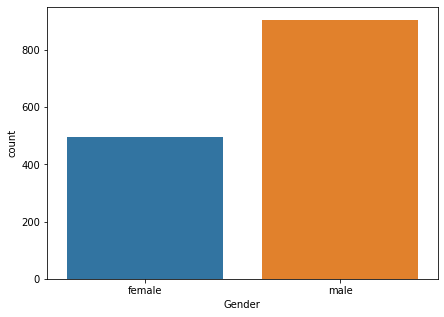

In [18]:
plt.figure(figsize=(7,5))
sns.countplot(x='Gender', data=df)

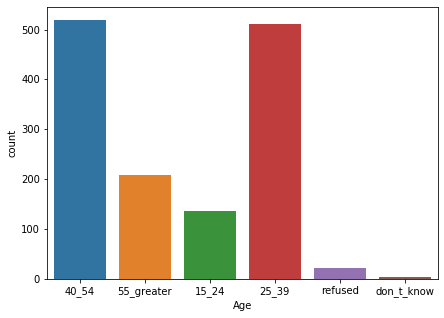

In [19]:
plt.figure(figsize=(7,5))
sns.countplot(x='Age', data=df)

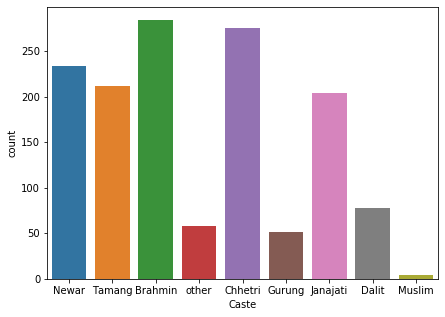

In [20]:
plt.figure(figsize=(7,5))
sns.countplot(x='Caste', data=df)

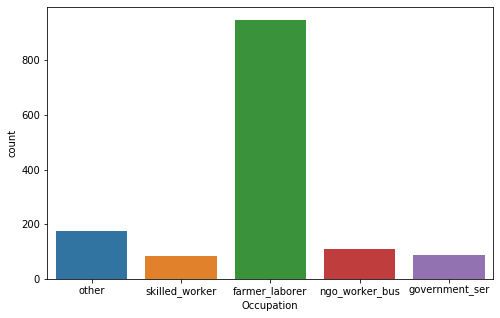

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x='Occupation', data=df)

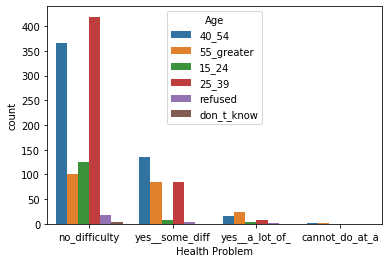

In [22]:
sns.countplot(x='Health Problem', data=df, hue='Age')

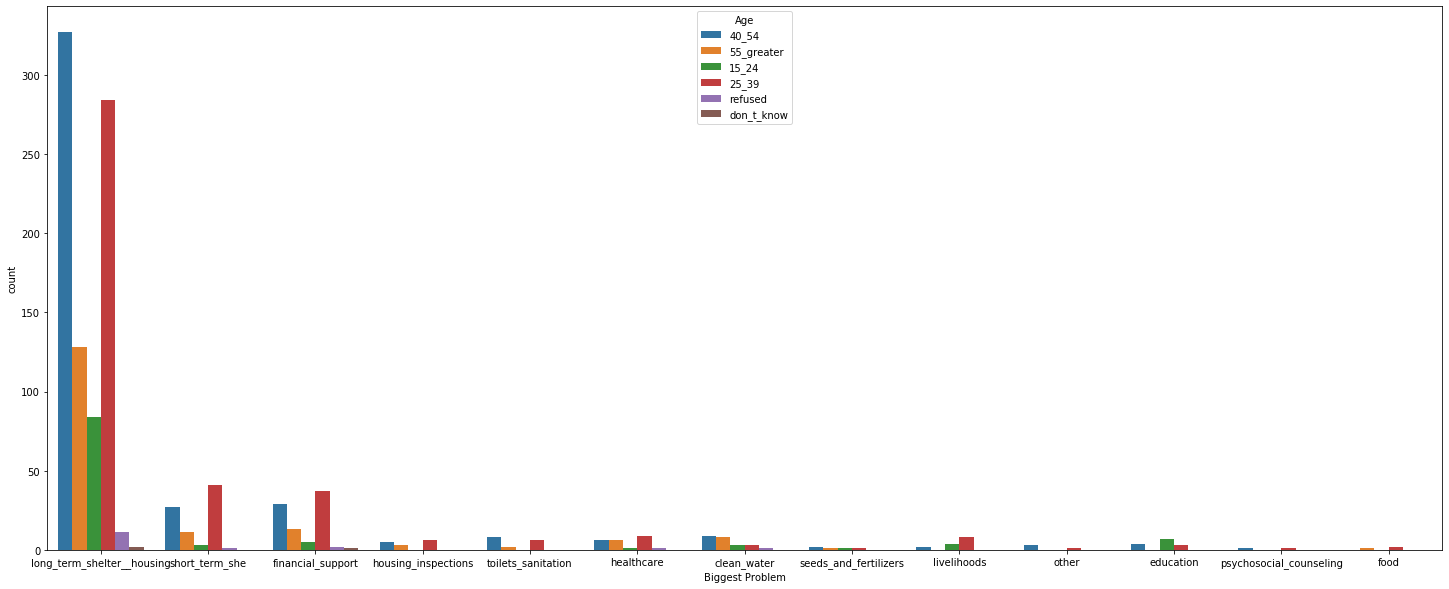

In [23]:
plt.figure(figsize=(25,10))
sns.countplot(x='Biggest Problem', data=df, hue='Age')

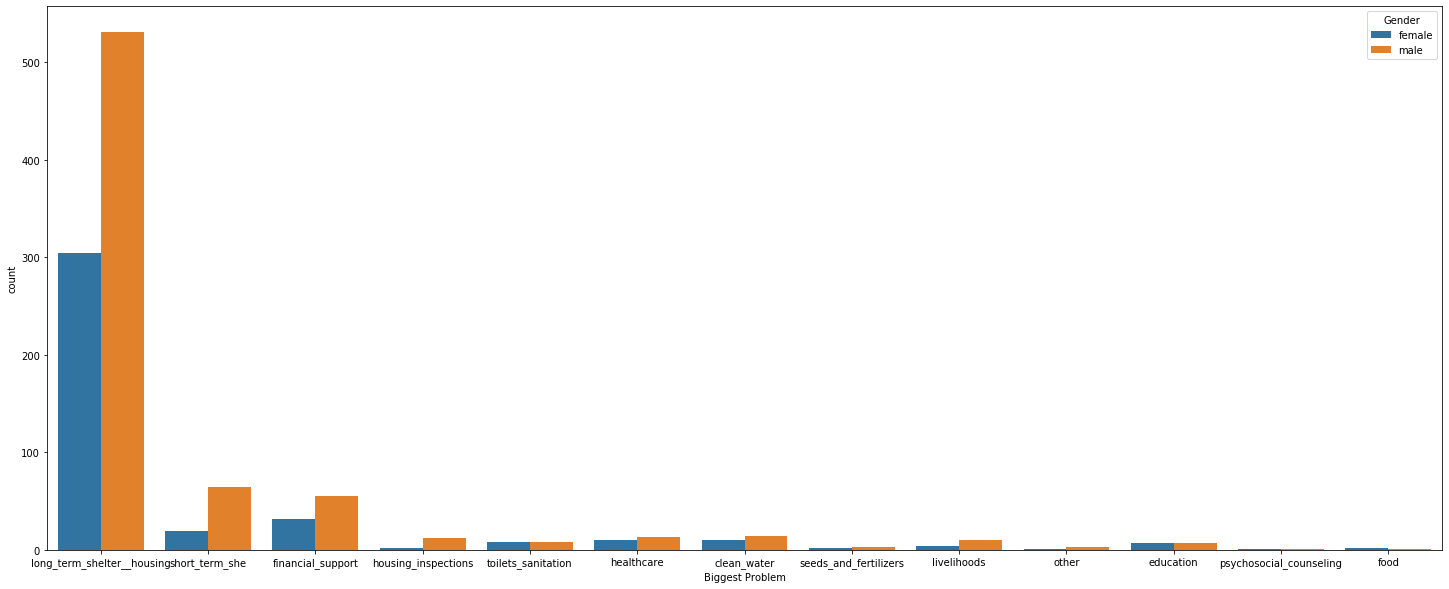

In [24]:
plt.figure(figsize=(25,10))
sns.countplot(x='Biggest Problem', data=df, hue='Gender')

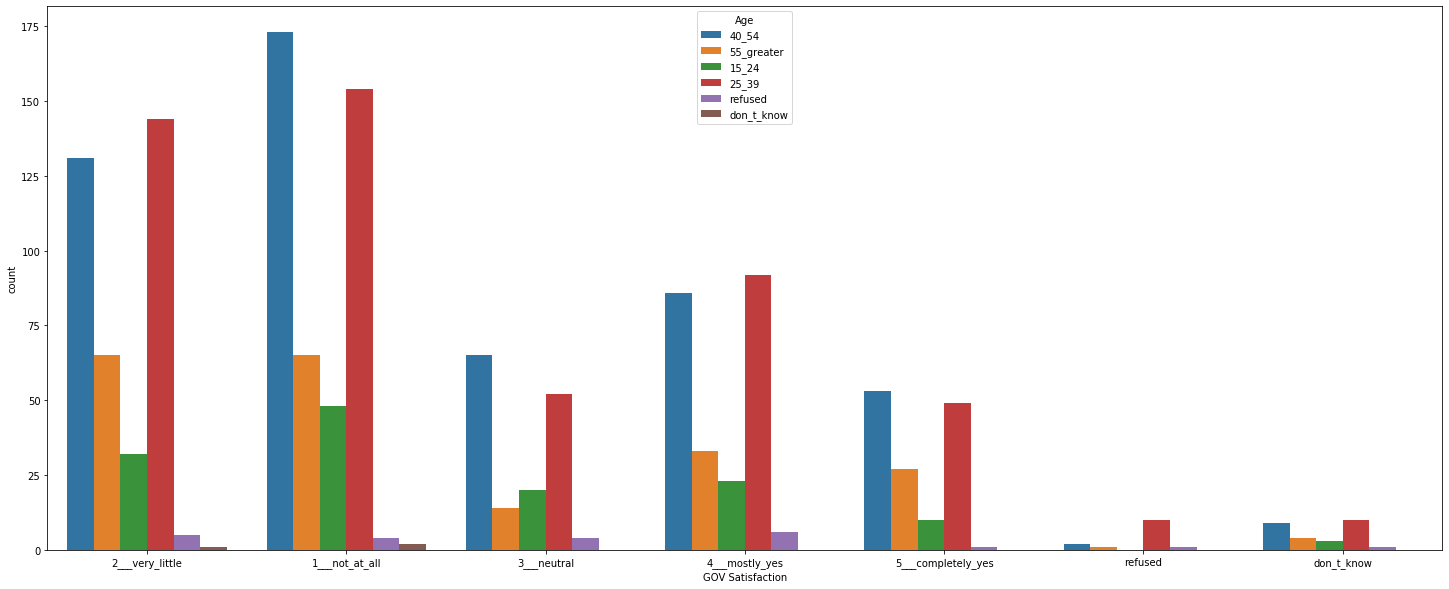

In [25]:
plt.figure(figsize=(25,10))
sns.countplot(x='GOV Satisfaction', data=df, hue='Age')

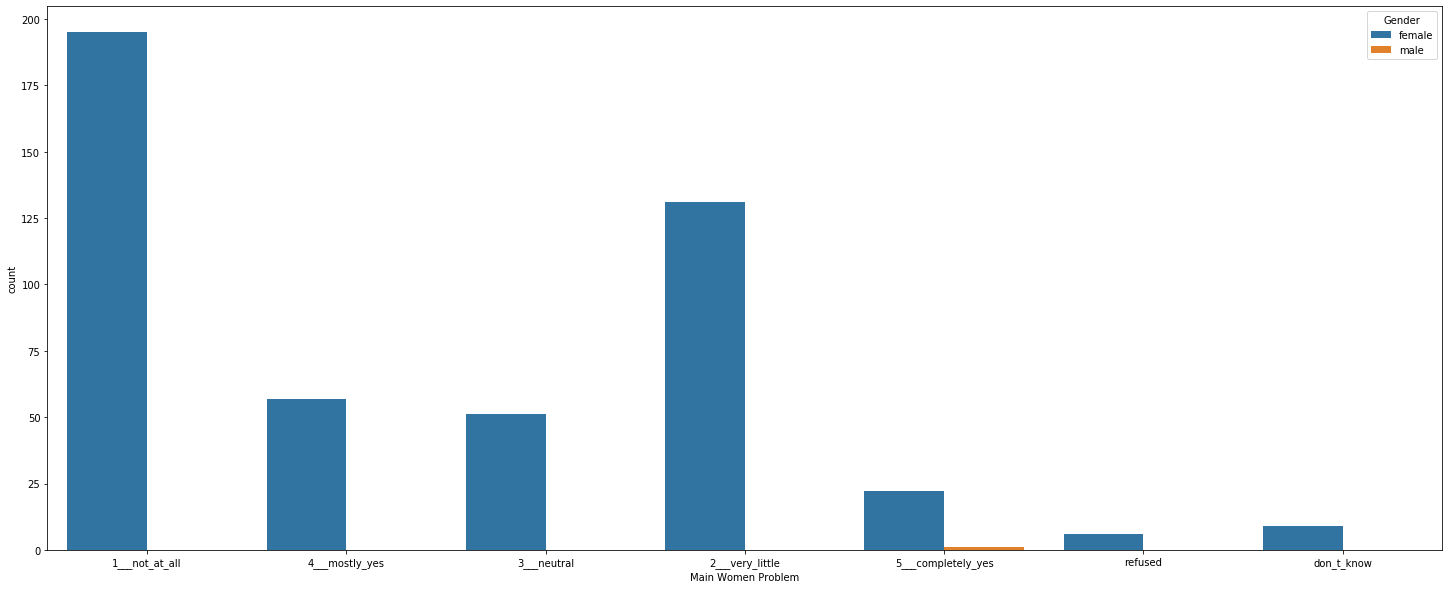

In [26]:
plt.figure(figsize=(25,10))
sns.countplot(x='Main Women Problem', data=df, hue='Gender')

<h2> Null Values </h2>

In [27]:
df['Gender'].value_counts()

male      905
female    495
Name: Gender, dtype: int64

In [28]:
df['Main Women Problem'].count()

472

In [29]:
df.drop(['Main Women Problem'], axis=1, inplace=True)

In [30]:
df.isna().sum()

District                    0
Age                         0
Gender                      0
Caste                       0
Occupation                  0
Health Problem              0
Main Problmes Met           0
Biggest Problem           275
Second Biggest Problem    275
Third Biggest Problem     275
GOV Satisfaction            0
Top Thing Gov             421
Second Thing Gov          421
Have Information            0
Top Need Info             598
Second Need Info          598
NGO Satisfaction            0
Top Need NGO              585
Second Need NGO           585
Support Fair                0
Top Reason Not Fair       679
Second Reason Not Fair    679
Prepared                    0
Heard                       0
Relief Effort Progress      0
dtype: int64

In [31]:
columns_with_null = [col for col in df.columns if df[col].isnull().any()]

for col in columns_with_null:
    df[col].fillna(df[col].value_counts().index[0], inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 25 columns):
District                  1400 non-null object
Age                       1400 non-null object
Gender                    1400 non-null object
Caste                     1400 non-null object
Occupation                1400 non-null object
Health Problem            1400 non-null object
Main Problmes Met         1400 non-null object
Biggest Problem           1400 non-null object
Second Biggest Problem    1400 non-null object
Third Biggest Problem     1400 non-null object
GOV Satisfaction          1400 non-null object
Top Thing Gov             1400 non-null object
Second Thing Gov          1400 non-null object
Have Information          1400 non-null object
Top Need Info             1400 non-null object
Second Need Info          1400 non-null object
NGO Satisfaction          1400 non-null object
Top Need NGO              1400 non-null object
Second Need NGO           1400 non-null object


<h2> Cluster Analysis </h2>

<h3> One Hot Encoding </h3>

In [33]:
one_hot_encoded_df = pd.DataFrame()

for col in df.columns:
    one_hot_encoded_df = pd.concat([one_hot_encoded_df, pd.get_dummies(df[col])], axis=1)

In [34]:
one_hot_encoded_df.head()

,Bhaktapur,Dhading,Dolakha,Gorkha,Kathmandu,Kavrepalanchok,Lalitpur,Makwanpur,Nuwakot,Okhaldhunga,...,5___completely,don_t_know,refused,1___not_at_all,2___very_little,3___neutral,4___mostly_yes,5___completely_yes,don_t_know,refused
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [35]:
from sklearn.cluster import KMeans

<h3> Elbow Method </h3>

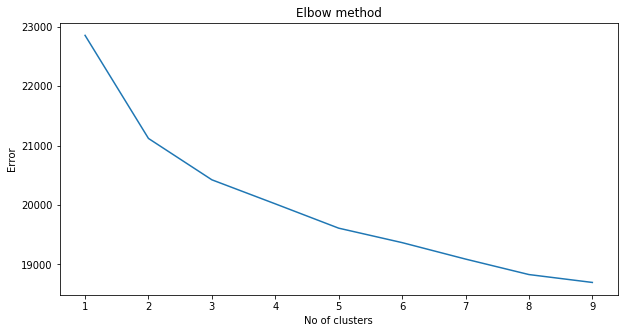

In [48]:
Error =[]
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i).fit(one_hot_encoded_df)
    kmeans.fit(one_hot_encoded_df)
    Error.append(kmeans.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(1, 10), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

https://heartbeat.fritz.ai/k-means-clustering-using-sklearn-and-python-4a054d67b187

<h3> Silhouette Method </h3>

In [37]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(one_hot_encoded_df)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(one_hot_encoded_df, labels, metric = 'euclidean')
    print("For n_clusters =", k,
          "The average silhouette_score is :", silhouette_avg)
    sil.append(silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.05726971379576684
For n_clusters = 3 The average silhouette_score is : 0.053169784537339115
For n_clusters = 4 The average silhouette_score is : 0.05120921013740197
For n_clusters = 5 The average silhouette_score is : 0.03325897057220211
For n_clusters = 6 The average silhouette_score is : 0.034618561734392414
For n_clusters = 7 The average silhouette_score is : 0.03749190179785894
For n_clusters = 8 The average silhouette_score is : 0.03792884883988737
For n_clusters = 9 The average silhouette_score is : 0.03559208169271032
For n_clusters = 10 The average silhouette_score is : 0.036546522044194174


In [38]:
kmeans = KMeans(n_clusters=2)

In [39]:
kmeans.fit(one_hot_encoded_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [40]:
kmeans.labels_

array([0, 1, 0, ..., 1, 0, 0], dtype=int32)

In [41]:
y_kmeans = kmeans.predict(one_hot_encoded_df)
y_kmeans

array([0, 1, 0, ..., 1, 0, 0], dtype=int32)

In [42]:
one_hot_encoded_df['Cluster'] = y_kmeans
df['Cluster'] = y_kmeans

In [43]:
df.head()

,District,Age,Gender,Caste,Occupation,Health Problem,Main Problmes Met,Biggest Problem,Second Biggest Problem,Third Biggest Problem,...,NGO Satisfaction,Top Need NGO,Second Need NGO,Support Fair,Top Reason Not Fair,Second Reason Not Fair,Prepared,Heard,Relief Effort Progress,Cluster
0,Kathmandu,40_54,female,Newar,other,no_difficulty,1___not_at_all,long_term_shelter__housing,financial_support,livelihoods,...,4___mostly_yes,building_mater,cash_for_work,don_t_know,based_on_polit,based_on_polit,4___mostly_yes,1___not_at_all,don_t_know,0
1,Kathmandu,55_greater,male,Newar,skilled_worker,no_difficulty,2___very_little,long_term_shelter__housing,financial_support,livelihoods,...,2___very_little,building_mater,food_aid,2___very_little,based_on_caste,based_on_polit,4___mostly_yes,2___not_very_m,2___very_little,1
2,Kathmandu,55_greater,male,Newar,skilled_worker,no_difficulty,2___very_little,long_term_shelter__housing,financial_support,livelihoods,...,4___mostly_yes,building_mater,cash_for_work,2___very_little,based_on_caste,based_on_polit,4___mostly_yes,1___not_at_all,1___not_at_all,0
3,Kathmandu,15_24,female,Tamang,other,yes__some_diff,3___neutral,long_term_shelter__housing,education,financial_support,...,3___neutral,building_mater,cash_for_work,3___neutral,based_on_dista,first_come__fi,4___mostly_yes,3___neutral,3___neutral,0
4,Kathmandu,25_39,female,Tamang,other,no_difficulty,3___neutral,short_term_she,long_term_shelter__housing,financial_support,...,3___neutral,building_mater,cash_for_work,3___neutral,based_on_polit,first_come__fi,4___mostly_yes,3___neutral,2___very_little,0


In [44]:
one_hot_encoded_df.head()

,Bhaktapur,Dhading,Dolakha,Gorkha,Kathmandu,Kavrepalanchok,Lalitpur,Makwanpur,Nuwakot,Okhaldhunga,...,don_t_know,refused,1___not_at_all,2___very_little,3___neutral,4___mostly_yes,5___completely_yes,don_t_know,refused,Cluster
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [45]:
# kmeans.cluster_centers_

<h3> PCA </h3>
<h7> Dimensionality Reduction </h7>

In [46]:
from sklearn.decomposition import PCA

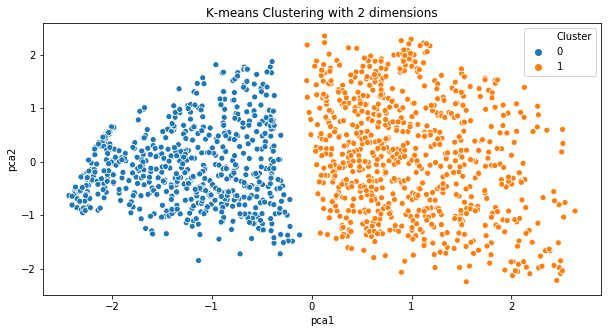

In [49]:
reduced_data = PCA(n_components=2).fit_transform(one_hot_encoded_df)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

plt.figure(figsize=(10,5))
sns.scatterplot(x="pca1", y="pca2", hue=one_hot_encoded_df['Cluster'], data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.show()